In this example we will load an image and then buil a matrix that we will call `pixels` and will look like this:

\begin{bmatrix}
r_1 & g_1 & b_1\\
\vdots & \vdots & \vdots\\
r_n & g_n & b_n
\end{bmatrix}

In this matrix each row represent the color of a given pixel in the image in the RGB space and the columns represent the intensity in a specific color.

We will use this matrix to train our SOM and then we will quantize the original set of colors to obtain a smaller set of colors that will segment the image into uniform areas.

training...



 [     0 / 10000 ]   0% - ? it/s
 [     0 / 10000 ]   0% - ? it/s
 [     1 / 10000 ]   0% - 0:00:03 left 
 [     2 / 10000 ]   0% - 0:00:05 left 
 [     3 / 10000 ]   0% - 0:00:05 left 
 [     4 / 10000 ]   0% - 0:00:05 left 
 [     5 / 10000 ]   0% - 0:00:04 left 
 [     6 / 10000 ]   0% - 0:00:04 left 
 [     7 / 10000 ]   0% - 0:00:04 left 
 [     8 / 10000 ]   0% - 0:00:04 left 
 [     9 / 10000 ]   0% - 0:00:04 left 
 [    10 / 10000 ]   0% - 0:00:04 left 
 [    11 / 10000 ]   0% - 0:00:04 left 
 [    12 / 10000 ]   0% - 0:00:04 left 
 [    13 / 10000 ]   0% - 0:00:03 left 
 [    14 / 10000 ]   0% - 0:00:04 left 
 [    15 / 10000 ]   0% - 0:00:04 left 
 [    16 / 10000 ]   0% - 0:00:03 left 
 [    17 / 10000 ]   0% - 0:00:03 left 
 [    18 / 10000 ]   0% - 0:00:03 left 
 [    19 / 10000 ]   0% - 0:00:03 left 
 [    20 / 10000 ]   0% - 0:00:03 left 
 [    21 / 10000 ]   0% - 0:00:03 left 
 [    22 / 10000 ]   0% - 0:00:03 left 
 [    23 / 10000 ]   0% - 0:00:03 left 
 [    24 / 10


 [  2154 / 10000 ]  22% - 0:00:01 left 
 [  2155 / 10000 ]  22% - 0:00:01 left 
 [  2156 / 10000 ]  22% - 0:00:01 left 
 [  2157 / 10000 ]  22% - 0:00:01 left 
 [  2158 / 10000 ]  22% - 0:00:01 left 
 [  2159 / 10000 ]  22% - 0:00:01 left 
 [  2160 / 10000 ]  22% - 0:00:01 left 
 [  2161 / 10000 ]  22% - 0:00:01 left 
 [  2162 / 10000 ]  22% - 0:00:01 left 
 [  2163 / 10000 ]  22% - 0:00:01 left 
 [  2164 / 10000 ]  22% - 0:00:01 left 
 [  2165 / 10000 ]  22% - 0:00:01 left 
 [  2166 / 10000 ]  22% - 0:00:01 left 
 [  2167 / 10000 ]  22% - 0:00:01 left 
 [  2168 / 10000 ]  22% - 0:00:01 left 
 [  2169 / 10000 ]  22% - 0:00:01 left 
 [  2170 / 10000 ]  22% - 0:00:01 left 
 [  2171 / 10000 ]  22% - 0:00:01 left 
 [  2172 / 10000 ]  22% - 0:00:01 left 
 [  2173 / 10000 ]  22% - 0:00:01 left 
 [  2174 / 10000 ]  22% - 0:00:01 left 
 [  2175 / 10000 ]  22% - 0:00:01 left 
 [  2176 / 10000 ]  22% - 0:00:01 left 
 [  2177 / 10000 ]  22% - 0:00:01 left 
 [  2178 / 10000 ]  22% - 0:00:01 left 


 [  2922 / 10000 ]  29% - 0:00:01 left 
 [  2923 / 10000 ]  29% - 0:00:01 left 
 [  2924 / 10000 ]  29% - 0:00:01 left 
 [  2925 / 10000 ]  29% - 0:00:01 left 
 [  2926 / 10000 ]  29% - 0:00:01 left 
 [  2927 / 10000 ]  29% - 0:00:01 left 
 [  2928 / 10000 ]  29% - 0:00:01 left 
 [  2929 / 10000 ]  29% - 0:00:01 left 
 [  2930 / 10000 ]  29% - 0:00:01 left 
 [  2931 / 10000 ]  29% - 0:00:01 left 
 [  2932 / 10000 ]  29% - 0:00:01 left 
 [  2933 / 10000 ]  29% - 0:00:01 left 
 [  2934 / 10000 ]  29% - 0:00:01 left 
 [  2935 / 10000 ]  29% - 0:00:01 left 
 [  2936 / 10000 ]  29% - 0:00:01 left 
 [  2937 / 10000 ]  29% - 0:00:01 left 
 [  2938 / 10000 ]  29% - 0:00:01 left 
 [  2939 / 10000 ]  29% - 0:00:01 left 
 [  2940 / 10000 ]  29% - 0:00:01 left 
 [  2941 / 10000 ]  29% - 0:00:01 left 
 [  2942 / 10000 ]  29% - 0:00:01 left 
 [  2943 / 10000 ]  29% - 0:00:01 left 
 [  2944 / 10000 ]  29% - 0:00:01 left 
 [  2945 / 10000 ]  29% - 0:00:01 left 
 [  2946 / 10000 ]  29% - 0:00:01 left 


 [  3594 / 10000 ]  36% - 0:00:01 left 
 [  3595 / 10000 ]  36% - 0:00:01 left 
 [  3596 / 10000 ]  36% - 0:00:01 left 
 [  3597 / 10000 ]  36% - 0:00:01 left 
 [  3598 / 10000 ]  36% - 0:00:01 left 
 [  3599 / 10000 ]  36% - 0:00:01 left 
 [  3600 / 10000 ]  36% - 0:00:01 left 
 [  3601 / 10000 ]  36% - 0:00:01 left 
 [  3602 / 10000 ]  36% - 0:00:01 left 
 [  3603 / 10000 ]  36% - 0:00:01 left 
 [  3604 / 10000 ]  36% - 0:00:01 left 
 [  3605 / 10000 ]  36% - 0:00:01 left 
 [  3606 / 10000 ]  36% - 0:00:01 left 
 [  3607 / 10000 ]  36% - 0:00:01 left 
 [  3608 / 10000 ]  36% - 0:00:01 left 
 [  3609 / 10000 ]  36% - 0:00:01 left 
 [  3610 / 10000 ]  36% - 0:00:01 left 
 [  3611 / 10000 ]  36% - 0:00:01 left 
 [  3612 / 10000 ]  36% - 0:00:01 left 
 [  3613 / 10000 ]  36% - 0:00:01 left 
 [  3614 / 10000 ]  36% - 0:00:01 left 
 [  3615 / 10000 ]  36% - 0:00:01 left 
 [  3616 / 10000 ]  36% - 0:00:01 left 
 [  3617 / 10000 ]  36% - 0:00:01 left 
 [  3618 / 10000 ]  36% - 0:00:01 left 


 [  4647 / 10000 ]  46% - 0:00:01 left 
 [  4648 / 10000 ]  46% - 0:00:01 left 
 [  4649 / 10000 ]  46% - 0:00:01 left 
 [  4650 / 10000 ]  46% - 0:00:01 left 
 [  4651 / 10000 ]  47% - 0:00:01 left 
 [  4652 / 10000 ]  47% - 0:00:01 left 
 [  4653 / 10000 ]  47% - 0:00:01 left 
 [  4654 / 10000 ]  47% - 0:00:01 left 
 [  4655 / 10000 ]  47% - 0:00:01 left 
 [  4656 / 10000 ]  47% - 0:00:01 left 
 [  4657 / 10000 ]  47% - 0:00:01 left 
 [  4658 / 10000 ]  47% - 0:00:01 left 
 [  4659 / 10000 ]  47% - 0:00:01 left 
 [  4660 / 10000 ]  47% - 0:00:01 left 
 [  4661 / 10000 ]  47% - 0:00:01 left 
 [  4662 / 10000 ]  47% - 0:00:01 left 
 [  4663 / 10000 ]  47% - 0:00:01 left 
 [  4664 / 10000 ]  47% - 0:00:01 left 
 [  4665 / 10000 ]  47% - 0:00:01 left 
 [  4666 / 10000 ]  47% - 0:00:01 left 
 [  4667 / 10000 ]  47% - 0:00:01 left 
 [  4668 / 10000 ]  47% - 0:00:01 left 
 [  4669 / 10000 ]  47% - 0:00:01 left 
 [  4670 / 10000 ]  47% - 0:00:01 left 
 [  4671 / 10000 ]  47% - 0:00:01 left 


 [  4959 / 10000 ]  50% - 0:00:01 left 
 [  4960 / 10000 ]  50% - 0:00:01 left 
 [  4961 / 10000 ]  50% - 0:00:01 left 
 [  4962 / 10000 ]  50% - 0:00:01 left 
 [  4963 / 10000 ]  50% - 0:00:01 left 
 [  4964 / 10000 ]  50% - 0:00:01 left 
 [  4965 / 10000 ]  50% - 0:00:01 left 
 [  4966 / 10000 ]  50% - 0:00:01 left 
 [  4967 / 10000 ]  50% - 0:00:01 left 
 [  4968 / 10000 ]  50% - 0:00:01 left 
 [  4969 / 10000 ]  50% - 0:00:01 left 
 [  4970 / 10000 ]  50% - 0:00:01 left 
 [  4971 / 10000 ]  50% - 0:00:01 left 
 [  4972 / 10000 ]  50% - 0:00:01 left 
 [  4973 / 10000 ]  50% - 0:00:01 left 
 [  4974 / 10000 ]  50% - 0:00:01 left 
 [  4975 / 10000 ]  50% - 0:00:01 left 
 [  4976 / 10000 ]  50% - 0:00:01 left 
 [  4977 / 10000 ]  50% - 0:00:01 left 
 [  4978 / 10000 ]  50% - 0:00:01 left 
 [  4979 / 10000 ]  50% - 0:00:01 left 
 [  4980 / 10000 ]  50% - 0:00:01 left 
 [  4981 / 10000 ]  50% - 0:00:01 left 
 [  4982 / 10000 ]  50% - 0:00:01 left 
 [  4983 / 10000 ]  50% - 0:00:01 left 


 [  5870 / 10000 ]  59% - 0:00:01 left 
 [  5871 / 10000 ]  59% - 0:00:01 left 
 [  5872 / 10000 ]  59% - 0:00:01 left 
 [  5873 / 10000 ]  59% - 0:00:01 left 
 [  5874 / 10000 ]  59% - 0:00:01 left 
 [  5875 / 10000 ]  59% - 0:00:01 left 
 [  5876 / 10000 ]  59% - 0:00:01 left 
 [  5877 / 10000 ]  59% - 0:00:01 left 
 [  5878 / 10000 ]  59% - 0:00:01 left 
 [  5879 / 10000 ]  59% - 0:00:01 left 
 [  5880 / 10000 ]  59% - 0:00:01 left 
 [  5881 / 10000 ]  59% - 0:00:01 left 
 [  5882 / 10000 ]  59% - 0:00:01 left 
 [  5883 / 10000 ]  59% - 0:00:01 left 
 [  5884 / 10000 ]  59% - 0:00:01 left 
 [  5885 / 10000 ]  59% - 0:00:01 left 
 [  5886 / 10000 ]  59% - 0:00:01 left 
 [  5887 / 10000 ]  59% - 0:00:01 left 
 [  5888 / 10000 ]  59% - 0:00:01 left 
 [  5889 / 10000 ]  59% - 0:00:01 left 
 [  5890 / 10000 ]  59% - 0:00:01 left 
 [  5891 / 10000 ]  59% - 0:00:01 left 
 [  5892 / 10000 ]  59% - 0:00:01 left 
 [  5893 / 10000 ]  59% - 0:00:01 left 
 [  5894 / 10000 ]  59% - 0:00:01 left 


 [  6410 / 10000 ]  64% - 0:00:00 left 
 [  6411 / 10000 ]  64% - 0:00:00 left 
 [  6412 / 10000 ]  64% - 0:00:00 left 
 [  6413 / 10000 ]  64% - 0:00:00 left 
 [  6414 / 10000 ]  64% - 0:00:00 left 
 [  6415 / 10000 ]  64% - 0:00:00 left 
 [  6416 / 10000 ]  64% - 0:00:00 left 
 [  6417 / 10000 ]  64% - 0:00:00 left 
 [  6418 / 10000 ]  64% - 0:00:00 left 
 [  6419 / 10000 ]  64% - 0:00:00 left 
 [  6420 / 10000 ]  64% - 0:00:00 left 
 [  6421 / 10000 ]  64% - 0:00:00 left 
 [  6422 / 10000 ]  64% - 0:00:00 left 
 [  6423 / 10000 ]  64% - 0:00:00 left 
 [  6424 / 10000 ]  64% - 0:00:00 left 
 [  6425 / 10000 ]  64% - 0:00:00 left 
 [  6426 / 10000 ]  64% - 0:00:00 left 
 [  6427 / 10000 ]  64% - 0:00:00 left 
 [  6428 / 10000 ]  64% - 0:00:00 left 
 [  6429 / 10000 ]  64% - 0:00:00 left 
 [  6430 / 10000 ]  64% - 0:00:00 left 
 [  6431 / 10000 ]  64% - 0:00:00 left 
 [  6432 / 10000 ]  64% - 0:00:00 left 
 [  6433 / 10000 ]  64% - 0:00:00 left 
 [  6434 / 10000 ]  64% - 0:00:00 left 


 [  7340 / 10000 ]  73% - 0:00:00 left 
 [  7341 / 10000 ]  73% - 0:00:00 left 
 [  7342 / 10000 ]  73% - 0:00:00 left 
 [  7343 / 10000 ]  73% - 0:00:00 left 
 [  7344 / 10000 ]  73% - 0:00:00 left 
 [  7345 / 10000 ]  73% - 0:00:00 left 
 [  7346 / 10000 ]  73% - 0:00:00 left 
 [  7347 / 10000 ]  73% - 0:00:00 left 
 [  7348 / 10000 ]  73% - 0:00:00 left 
 [  7349 / 10000 ]  73% - 0:00:00 left 
 [  7350 / 10000 ]  74% - 0:00:00 left 
 [  7351 / 10000 ]  74% - 0:00:00 left 
 [  7352 / 10000 ]  74% - 0:00:00 left 
 [  7353 / 10000 ]  74% - 0:00:00 left 
 [  7354 / 10000 ]  74% - 0:00:00 left 
 [  7355 / 10000 ]  74% - 0:00:00 left 
 [  7356 / 10000 ]  74% - 0:00:00 left 
 [  7357 / 10000 ]  74% - 0:00:00 left 
 [  7358 / 10000 ]  74% - 0:00:00 left 
 [  7359 / 10000 ]  74% - 0:00:00 left 
 [  7360 / 10000 ]  74% - 0:00:00 left 
 [  7361 / 10000 ]  74% - 0:00:00 left 
 [  7362 / 10000 ]  74% - 0:00:00 left 
 [  7363 / 10000 ]  74% - 0:00:00 left 
 [  7364 / 10000 ]  74% - 0:00:00 left 


 [  8326 / 10000 ]  83% - 0:00:00 left 
 [  8327 / 10000 ]  83% - 0:00:00 left 
 [  8328 / 10000 ]  83% - 0:00:00 left 
 [  8329 / 10000 ]  83% - 0:00:00 left 
 [  8330 / 10000 ]  83% - 0:00:00 left 
 [  8331 / 10000 ]  83% - 0:00:00 left 
 [  8332 / 10000 ]  83% - 0:00:00 left 
 [  8333 / 10000 ]  83% - 0:00:00 left 
 [  8334 / 10000 ]  83% - 0:00:00 left 
 [  8335 / 10000 ]  83% - 0:00:00 left 
 [  8336 / 10000 ]  83% - 0:00:00 left 
 [  8337 / 10000 ]  83% - 0:00:00 left 
 [  8338 / 10000 ]  83% - 0:00:00 left 
 [  8339 / 10000 ]  83% - 0:00:00 left 
 [  8340 / 10000 ]  83% - 0:00:00 left 
 [  8341 / 10000 ]  83% - 0:00:00 left 
 [  8342 / 10000 ]  83% - 0:00:00 left 
 [  8343 / 10000 ]  83% - 0:00:00 left 
 [  8344 / 10000 ]  83% - 0:00:00 left 
 [  8345 / 10000 ]  83% - 0:00:00 left 
 [  8346 / 10000 ]  83% - 0:00:00 left 
 [  8347 / 10000 ]  83% - 0:00:00 left 
 [  8348 / 10000 ]  83% - 0:00:00 left 
 [  8349 / 10000 ]  83% - 0:00:00 left 
 [  8350 / 10000 ]  84% - 0:00:00 left 


 [  9332 / 10000 ]  93% - 0:00:00 left 
 [  9333 / 10000 ]  93% - 0:00:00 left 
 [  9334 / 10000 ]  93% - 0:00:00 left 
 [  9335 / 10000 ]  93% - 0:00:00 left 
 [  9336 / 10000 ]  93% - 0:00:00 left 
 [  9337 / 10000 ]  93% - 0:00:00 left 
 [  9338 / 10000 ]  93% - 0:00:00 left 
 [  9339 / 10000 ]  93% - 0:00:00 left 
 [  9340 / 10000 ]  93% - 0:00:00 left 
 [  9341 / 10000 ]  93% - 0:00:00 left 
 [  9342 / 10000 ]  93% - 0:00:00 left 
 [  9343 / 10000 ]  93% - 0:00:00 left 
 [  9344 / 10000 ]  93% - 0:00:00 left 
 [  9345 / 10000 ]  93% - 0:00:00 left 
 [  9346 / 10000 ]  93% - 0:00:00 left 
 [  9347 / 10000 ]  93% - 0:00:00 left 
 [  9348 / 10000 ]  93% - 0:00:00 left 
 [  9349 / 10000 ]  93% - 0:00:00 left 
 [  9350 / 10000 ]  94% - 0:00:00 left 
 [  9351 / 10000 ]  94% - 0:00:00 left 
 [  9352 / 10000 ]  94% - 0:00:00 left 
 [  9353 / 10000 ]  94% - 0:00:00 left 
 [  9354 / 10000 ]  94% - 0:00:00 left 
 [  9355 / 10000 ]  94% - 0:00:00 left 
 [  9356 / 10000 ]  94% - 0:00:00 left 

/Users/giuseppe.vettigli/venv3/lib/python3.8/site-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.17145687187986391
quantization...
building new image...
done.


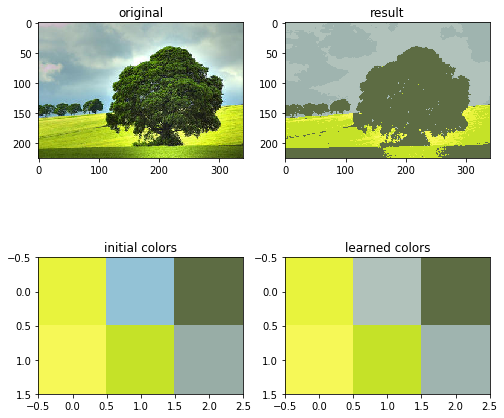

In [2]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read the image
img = plt.imread('tree.jpg')

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('training...')
som = MiniSom(2, 3, 3, sigma=1., random_seed=42,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('resulting_images/som_color_quantization.png')
plt.show()

This example is exactly the same but uses Scikit-Learn like API.

In [ ]:
from minisom.sklearn import MiniSOM

%matplotlib inline

# read the image
img = plt.imread('tree.jpg')

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('training...')
som = MiniSOM(2, 3, sigma=1.0,
              learning_rate=0.2, neighborhood_function='bubble', num_iteration=10000,
              random_order=True, verbose=True, random_seed=42)

print('quantization...')
qnt = som.fit_predict(pixels)

print('building new image...')
clustered = np.zeros_like(pixels)

starting_weights = som.init_weights_
for i, q in enumerate(qnt):
    x, y = np.unravel_index(q, som.weights_.shape[:2])  
    clustered[i] = starting_weights[x, y]

clustered = np.reshape(clustered, img.shape)
clustered = np.clip(clustered, 0, 1)

plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.weights_, interpolation='none')

plt.tight_layout()
plt.show()